In [158]:
#Import Dependencies
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_regression #NOT SURE THIS IS NEEDED
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Dataset:  OPIOIDS_ByYear_WithCounty.csv

Source: 

Description: 

#Variables/Columns



In [3]:
# Read the csv file into a pandas DataFrame
OpioidsAD = pd.read_csv('../../OpioidData/OPIOIDS_ByYear_WithCounty.csv')
OpioidsAD.head()

,AVG of CALC BASE WT IN GM,AVG of MME Conversion Factor,AVG of unit,Buyer City,Buyer Name,Buyer State,DOS,DosageUnit N,Number of Records,Reporter City,...,Reporter State,Reporter family,SUM of QUANTITY,Strength n,Transaction Year,buyer cityState,Buyer county,CountyStateYear,BuyerCountyPopulation,BuyerCountyDeaths
0,0.60540,1.0,0.0,ALBERTVILLE,VITAL CARE OF NORTH ALABAMA,AL,10.0,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,albertville AL,Marshall,"marshall county, al 2006",NaN,NaN
1,0.45405,1.0,0.0,AUBURN,AUBURN DRUGS,AL,7.5,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,auburn AL,Lee,"lee county, al 2006",NaN,NaN
2,3.02700,1.0,0.0,CHICKASAW,MEDICAL VILLAGE PHARMACY,AL,10.0,500.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,chickasaw AL,Mobile,"mobile county, al 2006",402916.0,19.0
3,1.51350,1.0,0.0,CHILDERSBURG,J & J DRUG CO,AL,5.0,500.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,childersburg AL,Talladega,"talladega county, al 2006",NaN,NaN
4,0.30270,1.0,0.0,DOUBLE SPRINGS,GATEWAY DISCOUNT DRUGS,AL,5.0,100.0,1,MCCALLA,...,AL,D & K Healthcare Resources,1,0.0,2006,double springs AL,Winston,"winston county, al 2006",NaN,NaN


In [5]:
#Get rid of columns that we don't need
OpioidsReduced = OpioidsAD.drop(OpioidsAD.columns[[0, 1, 2, 3, 4, 8, 14, 16, 18]], axis=1)
OpioidsReduced.head()

,Buyer State,DOS,DosageUnit N,Reporter City,Reporter Name,Reporter State,Reporter family,SUM of QUANTITY,Transaction Year,Buyer county,BuyerCountyPopulation,BuyerCountyDeaths
0,AL,10.0,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Marshall,NaN,NaN
1,AL,7.5,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Lee,NaN,NaN
2,AL,10.0,500.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Mobile,402916.0,19.0
3,AL,5.0,500.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Talladega,NaN,NaN
4,AL,5.0,100.0,MCCALLA,"D& K HEALTHCARE RESOURCES,",AL,D & K Healthcare Resources,1,2006,Winston,NaN,NaN


In [8]:
# Read the csv file with overdose data into a pandas DataFrame
OpioidDeaths = pd.read_csv('../Data/SummaryBuyers_Deathsv2.csv')
OpioidDeaths.head()

,Buyer State,Reporter State,Transaction Year,Total QUANTITY,Average of Strength,Average of DOS,Average of DosageUnit,Deaths Buyer state
0,AK,AK,2006,25580,0.000000,9.243488,367.328931,12
1,AK,AK,2007,27318,1.111111,8.959317,413.410806,12
2,AK,AK,2008,29816,0.000000,10.703696,439.934186,56
3,AK,AK,2009,31514,0.000000,9.855912,391.584806,83
4,AK,AK,2010,30101,0.000000,10.720634,425.409741,26


In [10]:
#Need to split and re-combine data in order to avoid double counting deaths (total deaths repeat for each line where the related county appears)
BuyerQuantity = OpioidDeaths.drop(OpioidDeaths.columns[[1, 4, 5, 6, 7]], axis=1)
BuyerQuantity.head()

,Buyer State,Transaction Year,Total QUANTITY
0,AK,2006,25580
1,AK,2007,27318
2,AK,2008,29816
3,AK,2009,31514
4,AK,2010,30101


In [120]:
#Group data by state and year
BuyerQuantity = BuyerQuantity.groupby(["Buyer State", "Transaction Year"]).sum().reset_index()
BuyerQuantity.head()

,Buyer State,Transaction Year,Total QUANTITY
0,AK,2006,63504
1,AK,2007,71997
2,AK,2008,79256
3,AK,2009,82841
4,AK,2010,87791


In [27]:
#drop columns from overdose data that we don't need
BuyerDeaths = OpioidDeaths.drop(OpioidDeaths.columns[[1, 3, 4, 5, 6]], axis=1)
BuyerDeaths.head()

,Buyer State,Transaction Year,Deaths Buyer state
0,AK,2006,12
1,AK,2007,12
2,AK,2008,56
3,AK,2009,83
4,AK,2010,26


In [123]:
#remove the duplicate observations to get rid of death double-counting
BuyerDeaths = BuyerDeaths.drop_duplicates().reset_index(drop=True)
BuyerDeaths.head(10)

,Buyer State,Transaction Year,Deaths Buyer state
0,AK,2006,12
1,AK,2007,12
2,AK,2008,56
3,AK,2009,83
4,AK,2010,26
5,AK,2011,46
6,AK,2012,52
7,AL,2006,69
8,AL,2007,120
9,AL,2008,114


In [124]:
#merge the df with quantity purchased and number of deaths on state and year
OpioidDeathsClean = pd.merge(BuyerQuantity, BuyerDeaths, on=["Buyer State", "Transaction Year"])
OpioidDeathsClean.columns = ["Buyer_State", "Transaction_Year", "Total_QUANTITY", "Deaths_Buyer_state"]
#OpioidDeathsClean['Buyer_State'] = OpioidDeathsClean['Buyer_State'].astype('|S')
OpioidDeathsClean = OpioidDeathsClean.sort_values(['Buyer_State', 'Transaction_Year'], ascending=[True, False]).reset_index(drop=True)
OpioidDeathsClean.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state
0,AK,2012,90042,52
1,AK,2011,90422,46
2,AK,2010,87791,26
3,AK,2009,82841,83
4,AK,2008,79256,56


In [138]:
# Read the csv file into a pandas DataFrame that includes population data
DeathData = pd.read_csv('../Data/opioidDeathsbyCounty.csv')
DeathData.head()

,Notes,County,State,County Code,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,Baldwin County,AL,1003,2006,2006,12,168121,Unreliable,Unreliable
1,NaN,Baldwin County,AL,1003,2007,2007,14,172404,Unreliable,Unreliable
2,NaN,Baldwin County,AL,1003,2008,2008,14,175827,Unreliable,Unreliable
3,NaN,Baldwin County,AL,1003,2009,2009,10,179406,Unreliable,Unreliable
4,NaN,Baldwin County,AL,1003,2010,2010,10,182265,Unreliable,Unreliable


In [139]:
#drop columns we don't need
DeathReduced = DeathData.drop(DeathData.columns[[0, 1, 3, 5, 8, 9]], axis=1)
DeathReduced.head()

,State,Year,Deaths,Population
0,AL,2006,12,168121
1,AL,2007,14,172404
2,AL,2008,14,175827
3,AL,2009,10,179406
4,AL,2010,10,182265


In [140]:
#group by state and year and sort data
DeathPop = DeathReduced.groupby(["State", "Year"]).sum().reset_index()
DeathPop.columns = ["Buyer_State", "Transaction_Year", "Deaths", "Population"]
DeathPop = DeathPop.sort_values(['Buyer_State', 'Transaction_Year'], ascending=[True, False]).reset_index(drop=True)
DeathPop.head()

,Buyer_State,Transaction_Year,Deaths,Population
0,AK,2012,52,392535
1,AK,2011,46,387516
2,AK,2010,26,291826
3,AK,2009,83,524596
4,AK,2008,56,365633


In [142]:
#merge the population data into the death/quantity data
OpioidDeathPop = pd.merge(OpioidDeathsClean, DeathPop, how = "left", on=["Buyer_State", "Transaction_Year"])
OpioidDeathPop = OpioidDeathPop.drop(OpioidDeathPop.columns[[4]], axis=1)
OpioidDeathPop.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state,Population
0,AK,2012,90042,52,392535.0
1,AK,2011,90422,46,387516.0
2,AK,2010,87791,26,291826.0
3,AK,2009,82841,83,524596.0
4,AK,2008,79256,56,365633.0


In [180]:
#Create a df for each year
OD2006 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2006].reset_index(drop=True)
OD2007 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2007].reset_index(drop=True)
OD2008 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2008].reset_index(drop=True)
OD2009 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2009].reset_index(drop=True)
OD2010 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2010].reset_index(drop=True)
OD2011 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2011].reset_index(drop=True)
OD2012 = OpioidDeathPop.loc[OpioidDeathPop['Transaction_Year'] == 2012].reset_index(drop=True)

In [210]:
OD2012.head()

,Buyer_State,Transaction_Year,Total_QUANTITY,Deaths_Buyer_state,Population
0,AK,2012,90042,52,392535.0
1,AL,2012,1072606,106,1398933.0
2,AR,2012,523276,42,832632.0
3,AZ,2012,1182229,497,5869987.0
4,CA,2012,5472031,1607,34830210.0


Begin Machine Learning - Linear Regression

In [189]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

OpioidDF = OD2012

X = OpioidDF.Total_QUANTITY.values.reshape(-1, 1)
y = OpioidDF.Deaths_Buyer_state.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (51, 1) (51, 1)


array([[  90042],
       [1072606],
       [ 523276],
       [1182229],
       [5472031],
       [ 743896],
       [ 481350],
       [  40199],
       [ 185484],
       [2786494],
       [1426999],
       [ 143015],
       [ 305828],
       [ 241248],
       [1127504],
       [1494162],
       [ 445912],
       [ 954271],
       [ 737236],
       [ 871452],
       [ 954992],
       [ 272130],
       [1562696],
       [ 532186],
       [1023931],
       [ 470178],
       [ 154344],
       [1697643],
       [  59694],
       [ 183068],
       [ 200489],
       [1079477],
       [ 327912],
       [ 607002],
       [2156572],
       [2128784],
       [ 775831],
       [ 866947],
       [2127377],
       [ 155988],
       [1507578],
       [  80484],
       [1514276],
       [2371508],
       [ 446789],
       [1150449],
       [  74975],
       [1135749],
       [ 837051],
       [ 476576],
       [  79464]], dtype=int64)

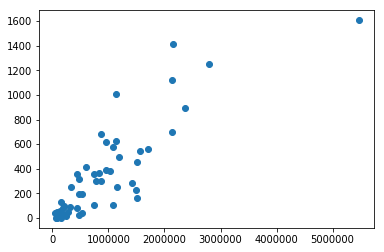

In [190]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [191]:
# Create the model and fit the model to the data

model = LinearRegression()

In [192]:
 # Fit the model to the data. 

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [193]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[0.00034703]]
y-axis intercept:  [37.30674402]


In [195]:
# transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array(X.min())
x_max = np.array(X.max())
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: 40199
Max X Value: 5472031


In [135]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


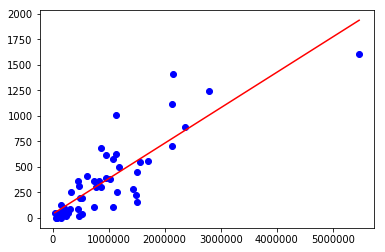

In [136]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


Checking how statistically accurate the model is

In [146]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 38900.44819154301
R-squared (R2 ): 0.7284220209695873


In [155]:
# Overall Score for the model
model.score(X, y)

0.7284220209695873

In [196]:
#predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predicted[0]}")
print(f"Prediction Error: {predicted[0]-y[0]}")

True output: [52]
Predicted output: [68.5537666]
Prediction Error: [16.5537666]


In [207]:
yList = []
for list in y:
    for value in list:
        yList.append(value)
        
predictedList = []
for list in predicted:
    for value in list:
        predictedList.append(value)

error = y-predicted
errorList = []
for list in error:
    for value in list:
        errorList.append(value)


In [209]:
OpioidsPredictvActual = pd.DataFrame({"Predicted": predictedList, "Actual": yList, "Error": errorList})#[["Predicted", "Actual", "Error"]]
OpioidsPredictvActual.head()

,Predicted,Actual,Error
0,68.553767,52,-16.553767
1,409.530194,106,-303.530194
2,218.897746,42,-176.897746
3,447.572356,497,49.427644
4,1936.250306,1607,-329.250306


In [156]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [159]:
# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [160]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\snhar\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [161]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

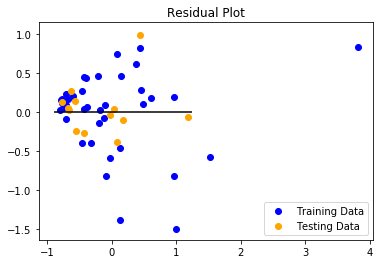

In [162]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Calculating and modeling growth

In [213]:
TotalYOYPurchases = [OD2006["Total_QUANTITY"].sum(), OD2007["Total_QUANTITY"].sum(), OD2008["Total_QUANTITY"].sum(), OD2009["Total_QUANTITY"].sum(), OD2010["Total_QUANTITY"].sum(), OD2011["Total_QUANTITY"].sum(), OD2012["Total_QUANTITY"].sum()]
TotalYOYPurchases

[28107230, 31566603, 34542881, 38226473, 42900757, 47050374, 47337374]

In [218]:
first = TotalYOYPurchases[0]
last = TotalYOYPurchases[6]
periods = 7
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

OpioidCAGR = CAGR(first, last, periods)
OpioidCAGR

0.07731045239115963

In [255]:
FutureQuantity = pd.DataFrame({"State":OD2012["Buyer_State"], "2012_Check": OD2012["Total_QUANTITY"], "2013_PillQuantity": OD2012["Total_QUANTITY"]*(1+OpioidCAGR), "2014_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**2), "2015_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**3), "2016_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**4), "2017_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**5), "2018_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**6), "2019_PillQuantity": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)*7), "PillQuantity2020": OD2012["Total_QUANTITY"]*((1+OpioidCAGR)**8) })

In [256]:
FutureQuantity = FutureQuantity.round()
FutureQuantity.head()

,State,2012_Check,2013_PillQuantity,2014_PillQuantity,2015_PillQuantity,2016_PillQuantity,2017_PillQuantity,2018_PillQuantity,2019_PillQuantity,PillQuantity2020
0,AK,90042,97003.0,104503.0,112582.0,121285.0,130662.0,140764.0,679022.0,163370.0
1,AL,1072606,1155530.0,1244864.0,1341105.0,1444787.0,1556484.0,1676816.0,8088708.0,1946109.0
2,AR,523276,563731.0,607313.0,654265.0,704846.0,759338.0,818043.0,3946115.0,949419.0
3,AZ,1182229,1273628.0,1372092.0,1478169.0,1592447.0,1715560.0,1848191.0,8915394.0,2145006.0
4,CA,5472031,5895076.0,6350827.0,6841813.0,7370756.0,7940593.0,8554483.0,41265533.0,9928315.0


In [259]:
X_2020 = FutureQuantity.PillQuantity2020.values.reshape(-1, 1)
X_2020.shape

(51, 1)

In [261]:
predicted2020 = model.predict(X_2020)

In [277]:
predicted2020
List2020 = []
for list in predicted2020:
    for value in list:
        List2020.append(value)
        
QuantityDeaths2020 = pd.DataFrame({"State":OD2012["Buyer_State"], "Quantity2020":FutureQuantity["PillQuantity2020"], "Deaths2020":List2020})
QuantityDeaths2020

,State,Quantity2020,Deaths2020
0,AK,163370.0,94.000577
1,AL,1946109.0,712.659489
2,AR,949419.0,366.780955
3,AZ,2145006.0,781.682157
4,CA,9928315.0,3482.702036
5,CO,1349706.0,505.691429
6,CT,873349.0,340.382597
7,DC,72936.0,62.617519
8,DE,336537.0,154.094235
9,FL,5055744.0,1791.787396


In [287]:
TotalDeaths2020 = QuantityDeaths2020["Deaths2020"].sum()
MNDeaths2020 = QuantityDeaths2020["Deaths2020"][23]

In [288]:
print(f"Total Predicted Opioid Overdose Deaths - US: {TotalDeaths2020}, MN: " + str(MNDeaths2020))

Total Predicted Opioid Overdose Deaths - US: 31708.022898586245, MN: 372.39099682073163
